<a href="https://colab.research.google.com/github/Aniketh-GHub/Supervised-Learning-Projects/blob/main/German_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
# Loading the data
data = pd.read_csv("/content/Top_12_German_Companies NEW.csv")

In [5]:
data.head()

,Company,Period,Revenue,Net Income,Liabilities,Assets,Equity,ROA (%),ROE (%),Debt to Equity,percentage Debt to Equity
0,Volkswagen AG,12/31/2017,9750496618,5.168898e+08,21354201295,54861302788,33507101493,942.175.618,1.542.627.668,637.303.746,"0,00%"
1,Siemens AG,12/31/2017,19716237464,1.276840e+09,45009303223,75268101508,30258798286,1.696.389.282,4.219.731.382,1.487.478.214,"283,68%"
2,Allianz SE,12/31/2017,19458831198,1.600107e+09,48538978480,69583711255,21044732775,2.299.542.624,7.603.361.452,2.306.466.848,"329,65%"
3,BMW AG,12/31/2017,18808147150,9.601843e+08,35382107627,67327482638,31945375011,142.614.028,3.005.706.927,1.107.581.539,"0,00%"
4,BASF SE,12/31/2017,16895580815,1.797082e+09,28309420014,68036567115,39727147101,2.641.347.127,4.523.561.449,71.259.635,"634,80%"


In [6]:
data.tail()

,Company,Period,Revenue,Net Income,Liabilities,Assets,Equity,ROA (%),ROE (%),Debt to Equity,percentage Debt to Equity
379,SAP SE,9/30/2024,10824151396,8.302800e+08,42369695133,72342104340,29972409208,114.771.336,2.770.147.673,1.413.623.271,"0,00%"
380,Bayer AG,9/30/2024,9332023907,7.466675e+08,23673143006,42677324477,19004181470,1.749.565.031,3.928.964.508,1.245.680.749,"0,00%"
381,Deutsche Bank AG,9/30/2024,18549946525,2.323022e+09,49199711543,64461554635,15261843092,3.603.732.773,1.522.111.161,3.223.707.074,"472,16%"
382,Porsche AG,9/30/2024,15911174550,1.241694e+09,36125130235,84583217359,48458087124,1.468.014.459,2.562.407.917,745.492.288,"343,72%"
383,Merck KGaA,9/30/2024,15036344926,1.704098e+09,30603212259,59444780752,28841568494,2.866.690.036,5.908.477.575,1.061.080.026,"556,84%"


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     384 non-null    object 
 1   Period                      384 non-null    object 
 2   Revenue                     384 non-null    int64  
 3   Net Income                  384 non-null    float64
 4   Liabilities                 384 non-null    int64  
 5   Assets                      384 non-null    int64  
 6   Equity                      384 non-null    int64  
 7   ROA (%)                     384 non-null    object 
 8   ROE (%)                     384 non-null    object 
 9   Debt to Equity              384 non-null    object 
 10  percentage  Debt to Equity  384 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 33.1+ KB


In [8]:
#numerical stats
data.describe()

,Revenue,Net Income,Liabilities,Assets,Equity
count,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02
mean,1.270992e+10,1.249025e+09,3.115579e+10,6.141624e+10,3.026045e+10
std,4.095183e+09,5.445441e+08,1.139538e+10,1.698922e+10,1.172803e+10
min,5.149850e+09,2.980309e+08,1.004637e+10,2.177324e+10,1.001762e+10
25%,9.315161e+09,8.643813e+08,2.085174e+10,5.074013e+10,1.966813e+10
50%,1.266963e+10,1.145476e+09,3.230659e+10,6.020715e+10,2.999063e+10
75%,1.621724e+10,1.560234e+09,4.088942e+10,7.369075e+10,3.984646e+10
max,1.990964e+10,2.884007e+09,4.976940e+10,9.657402e+10,4.991812e+10


In [9]:
#missing values
data.isna().sum()

,0
Company,0
Period,0
Revenue,0
Net Income,0
Liabilities,0
Assets,0
Equity,0
ROA (%),0
ROE (%),0
Debt to Equity,0


In [10]:
data.columns

Index(['Company', 'Period', 'Revenue', 'Net Income', 'Liabilities', 'Assets',
       'Equity', 'ROA (%)', 'ROE (%)', 'Debt to Equity',
       'percentage  Debt to Equity'],
      dtype='object')

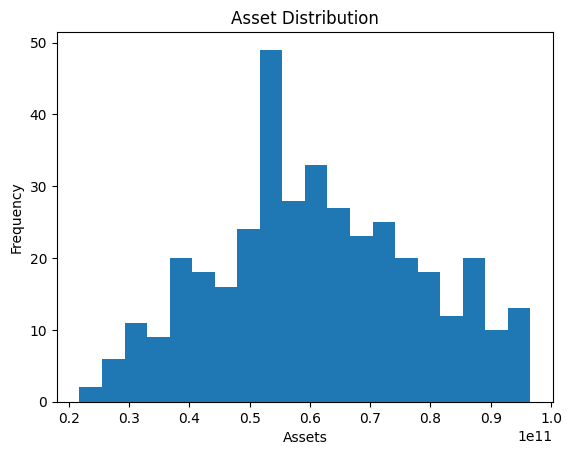

In [11]:
#Histogram for Asset distribution
data['Assets'].plot(kind='hist', bins=20, title='Asset Distribution')
plt.xlabel('Assets')
plt.show()

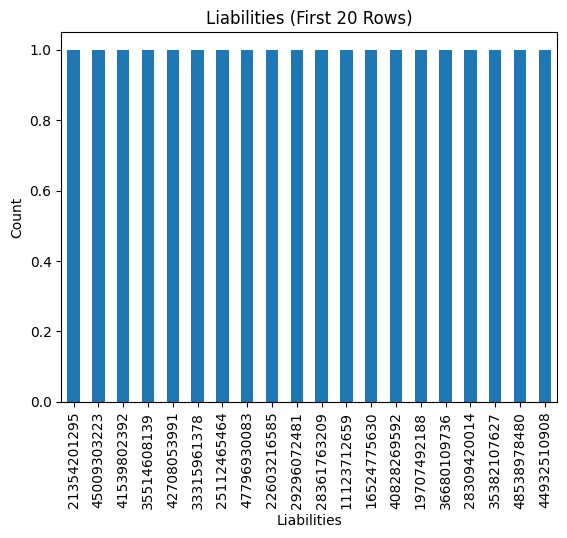

In [ ]:
#Bar plot for Liabilities
data['Liabilities'].head(20).value_counts().plot(kind='bar', title='Liabilities (First 20 Rows)')
plt.xlabel('Liabilities')
plt.ylabel('Count')
plt.show()

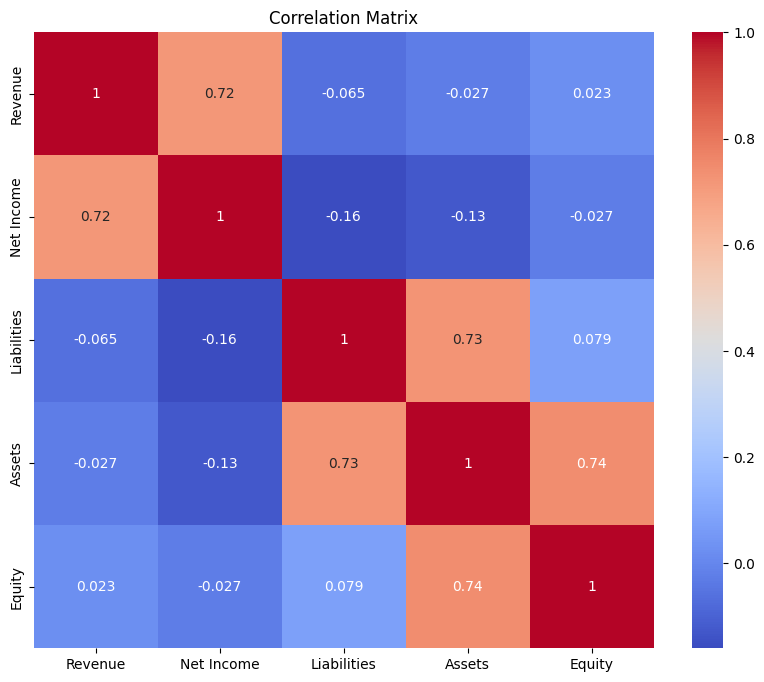

In [ ]:
# Correlation matrix
numeric_data = data.select_dtypes(include='number')
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

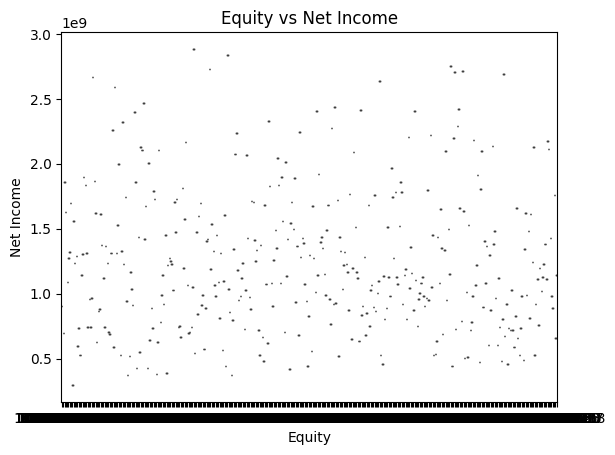

In [ ]:
#Analyzing impact of Age on Exited
sns.boxplot(x='Equity', y='Net Income', data=data)
plt.title('Equity vs Net Income')
plt.show()

In [ ]:
data = pd.get_dummies(data = data,drop_first=True)
print(data)

         Revenue    Net Income  Liabilities       Assets       Equity  \
0     9750496618  5.168898e+08  21354201295  54861302788  33507101493   
1    19716237464  1.276840e+09  45009303223  75268101508  30258798286   
2    19458831198  1.600107e+09  48538978480  69583711255  21044732775   
3    18808147150  9.601843e+08  35382107627  67327482638  31945375011   
4    16895580815  1.797082e+09  28309420014  68036567115  39727147101   
..           ...           ...          ...          ...          ...   
379  10824151396  8.302800e+08  42369695133  72342104340  29972409208   
380   9332023907  7.466675e+08  23673143006  42677324477  19004181470   
381  18549946525  2.323022e+09  49199711543  64461554635  15261843092   
382  15911174550  1.241694e+09  36125130235  84583217359  48458087124   
383  15036344926  1.704098e+09  30603212259  59444780752  28841568494   

     Company_BASF SE  Company_BMW AG  Company_Bayer AG  Company_Daimler AG  \
0              False           False         

In [13]:
# Define the target variable and feature variables
X = data.drop(columns=['Period', 'ROA (%)', 'ROE (%)', 'Debt to Equity', 'percentage  Debt to Equity'], errors='ignore')  # Exclude unnecessary columns
y = data['Equity']  # Target variable

In [14]:
print(X.head())  # Preview feature variables
print(y.head())  # Preview target variable



         Company      Revenue    Net Income  Liabilities       Assets  \
0  Volkswagen AG   9750496618  5.168898e+08  21354201295  54861302788   
1     Siemens AG  19716237464  1.276840e+09  45009303223  75268101508   
2     Allianz SE  19458831198  1.600107e+09  48538978480  69583711255   
3         BMW AG  18808147150  9.601843e+08  35382107627  67327482638   
4        BASF SE  16895580815  1.797082e+09  28309420014  68036567115   

        Equity  
0  33507101493  
1  30258798286  
2  21044732775  
3  31945375011  
4  39727147101  
0    33507101493
1    30258798286
2    21044732775
3    31945375011
4    39727147101
Name: Equity, dtype: int64


In [15]:
X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical variables

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (307, 16)
x test:  (77, 16)
y train:  (307,)
y test:  (77,)


In [17]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [18]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-6.97522347e-17 -2.27595720e-15  4.00510854e-07 -4.00510854e-07
  1.00000040e+00 -5.43183518e-08 -6.96313772e-08 -2.29782841e-08
  4.80398475e-08 -8.83923928e-08  1.36830497e-07  2.14740511e-08
  1.33073766e-06  9.69794605e-08  3.33330075e-07 -1.17919689e-07]
Intercept: 1.52587890625e-05


In [19]:
# Evaluate the model using Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.6016556046806373e-11


In [20]:
error= y_test-y_pred
print(error)

268    0.000000
250    0.000000
355   -0.000002
332   -0.000004
56    -0.000004
         ...   
104    0.000000
167   -0.000004
63    -0.000004
233    0.000008
84    -0.000004
Name: Equity, Length: 77, dtype: float64


<Axes: ylabel='Equity'>

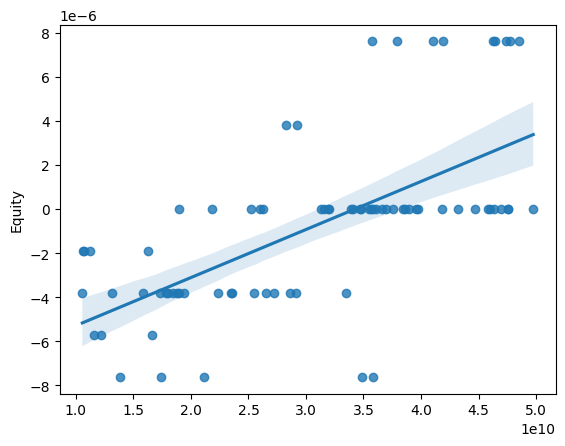

In [21]:
sns.regplot(x=y_pred, y=error, data=data)